<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook/Lab02_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
h = pd.read_excel('홍길동_512.32Hz_1.xlsx')
myecg = h.iloc[1:,1].to_numpy()
myecg.shape
t0 = int(myecg.shape[0]/2)
fs = 512

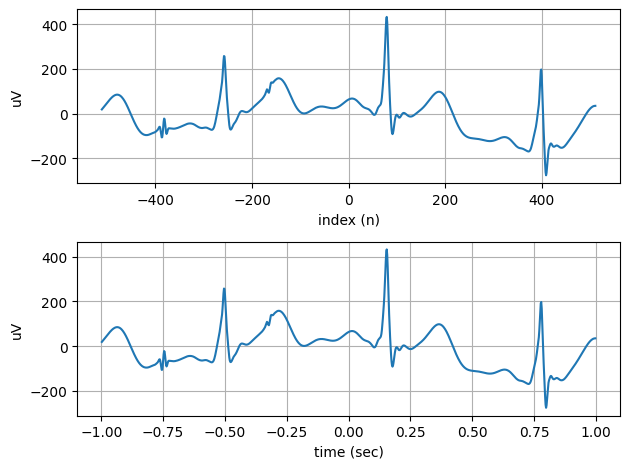

In [14]:
x = myecg[t0-511:t0+512]
t = -(511/fs) + np.arange(len(x))/fs
n = np.arange(len(x))-511
n0 = int(len(n)/2)
plt.subplot(211)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.ylabel('uV')
plt.grid('on')

plt.subplot(212)
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('uV')
plt.grid('on')

plt.tight_layout()

plt.show()

## System 1: Identity/Amplication/Attenuation
- h[n] = K δ[n]

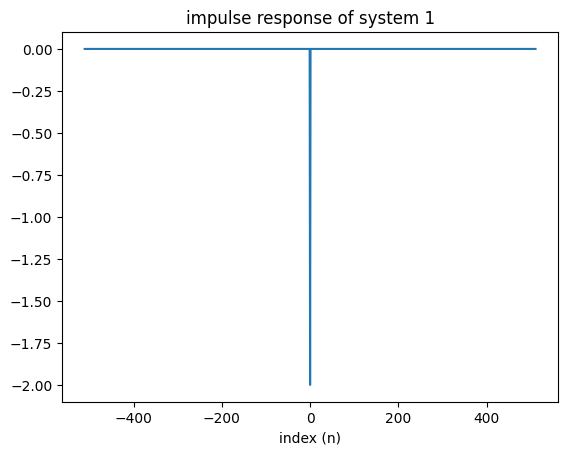

In [19]:
K = -2
h = np.zeros(x.shape)
h[n0] = K
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 1')
plt.show()

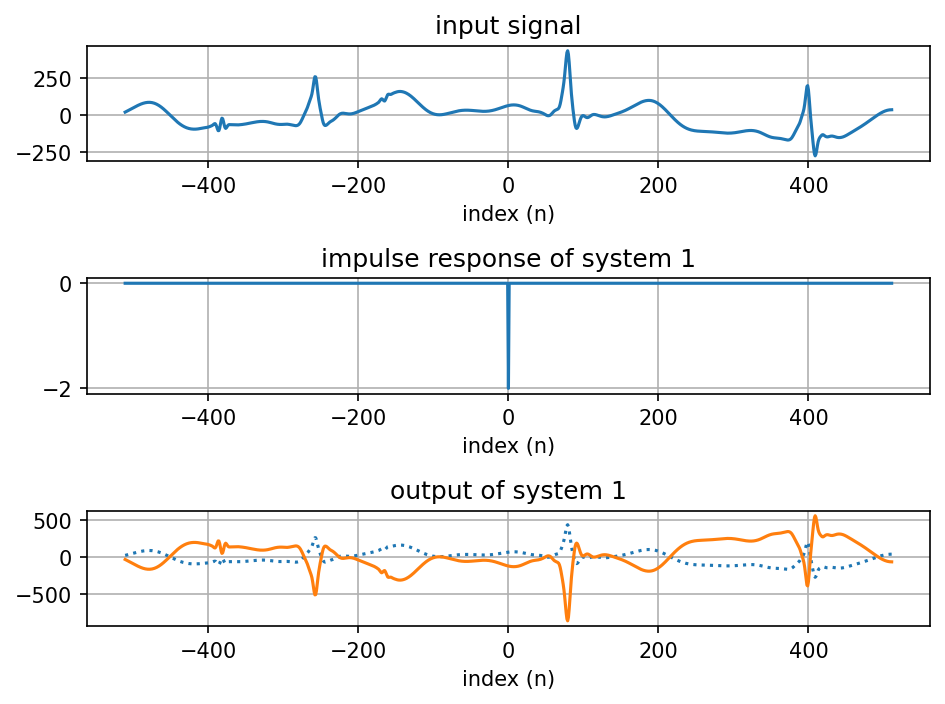

In [20]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')

plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 1')
plt.grid('on')

plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 1')
plt.grid('on')

plt.tight_layout()
plt.show()

## System 2: Shift
- h[n] = δ[n-200]

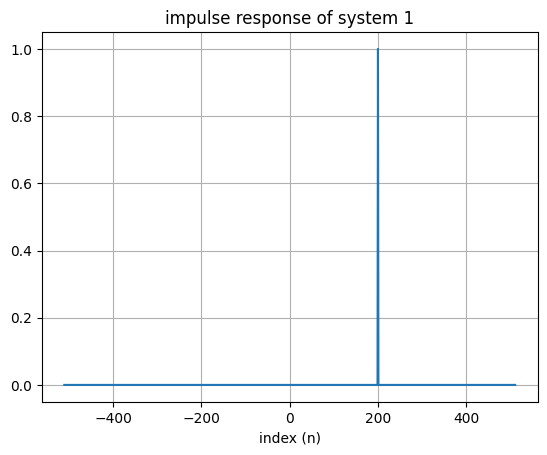

In [21]:
h = np.zeros(x.shape)
h[n0 + 200] = 1
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 1')
plt.grid('on')

plt.show()

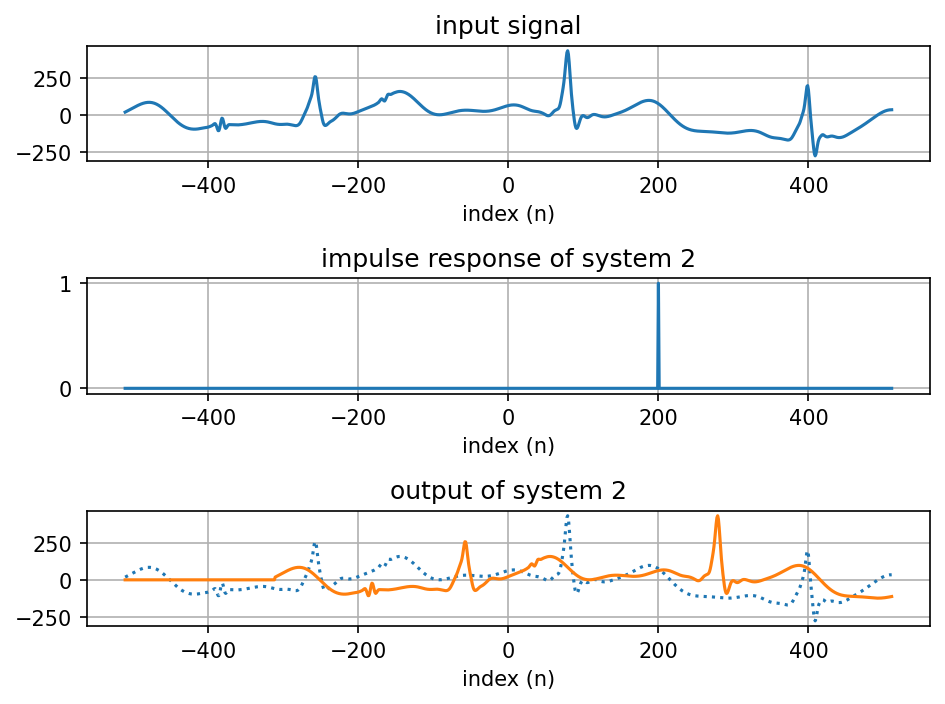

In [22]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')

plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 2')
plt.grid('on')

plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 2')
plt.grid('on')


plt.tight_layout()
plt.show()

## System 3: Echo
- h[n] = δ[n] + 2δ[n-200]

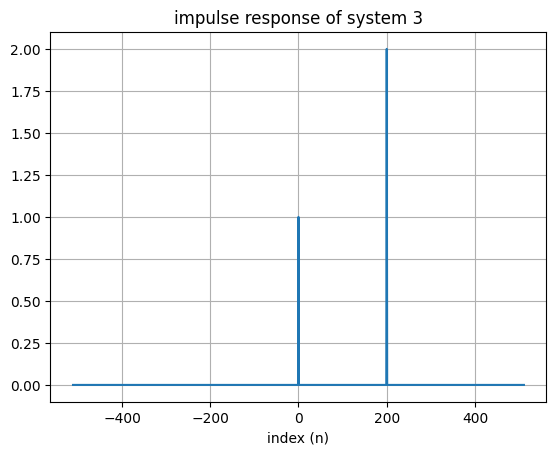

In [23]:
h = np.zeros(x.shape)
h[n0] = 1
h[n0 + 200] = 2
#h[n0 - 200] = -0.5
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 3')
plt.grid('on')

plt.show()

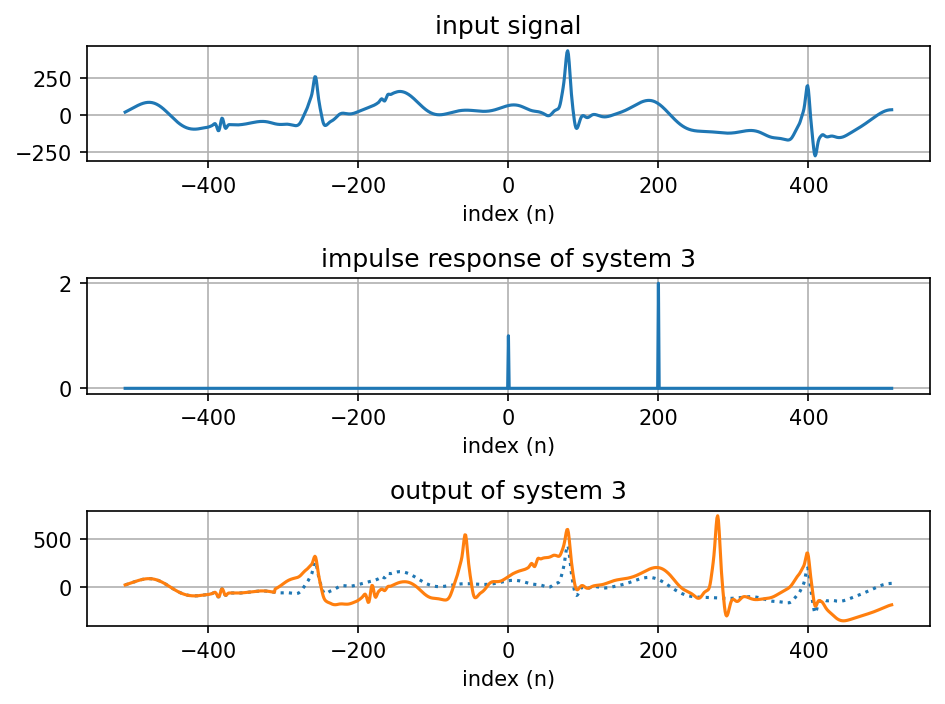

In [24]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')

plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 3')
plt.grid('on')

plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 3')
plt.grid('on')

plt.tight_layout()
plt.show()

## System 4: running sum
- h[n] = u[n]

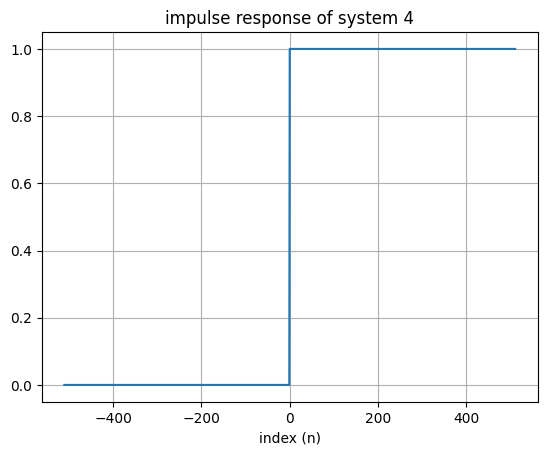

In [25]:
h = np.zeros(x.shape)
h[n0:] = 1
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 4')
plt.grid('on')
plt.show()

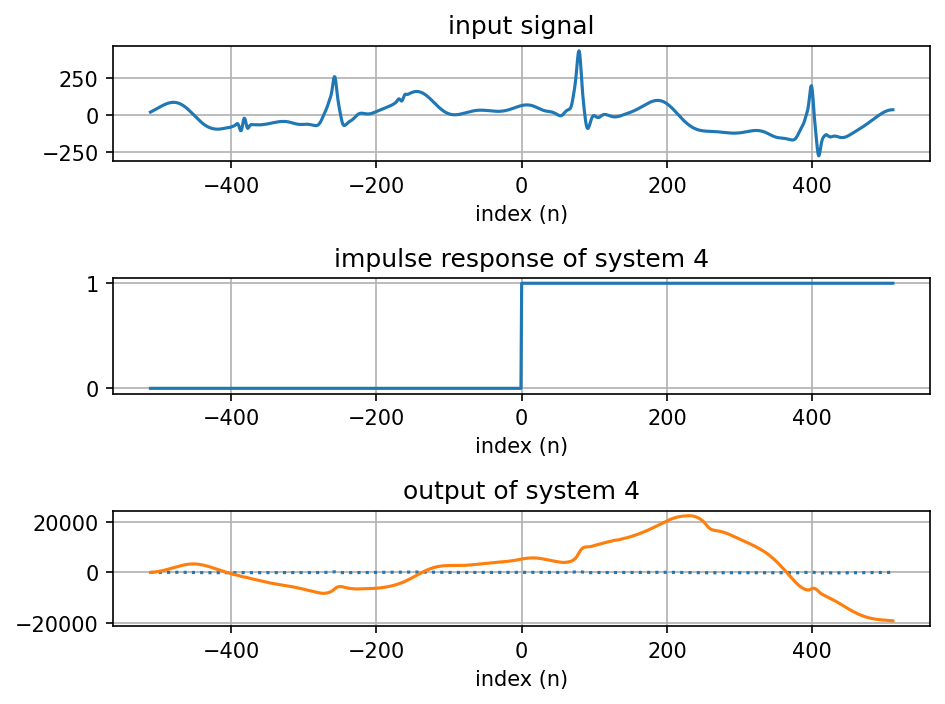

In [26]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 4')
plt.grid('on')


plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 4')
plt.grid('on')


plt.tight_layout()
plt.show()

## System 5: First derivative (first difference)
- h[n] = δ[n] - δ[n-1]

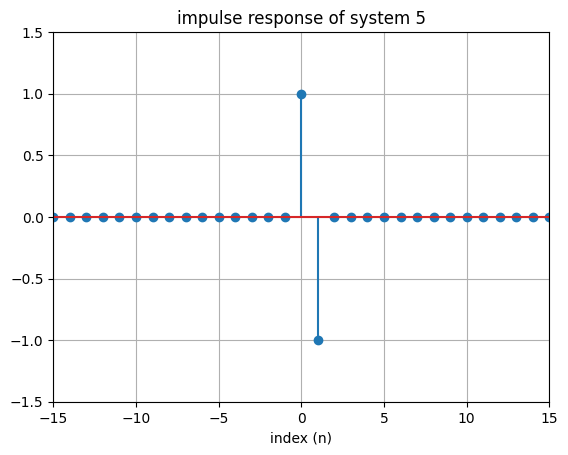

In [27]:
h = np.zeros(x.shape)
h[n0] = 1
h[n0 + 1] = -1
plt.stem(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 5')
plt.grid('on')
plt.axis([-15,15,-1.5,1.5])
plt.show()

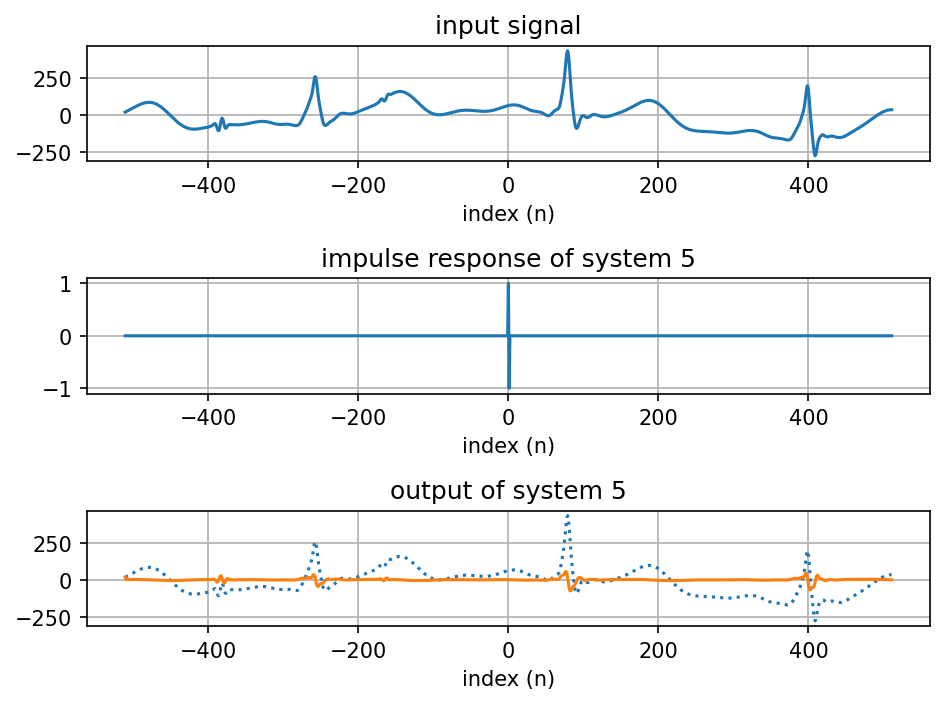

In [28]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 5')
plt.grid('on')


plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 5')
plt.grid('on')


plt.tight_layout()
plt.show()

## System 6: moving average
- h[n] is a square pulse

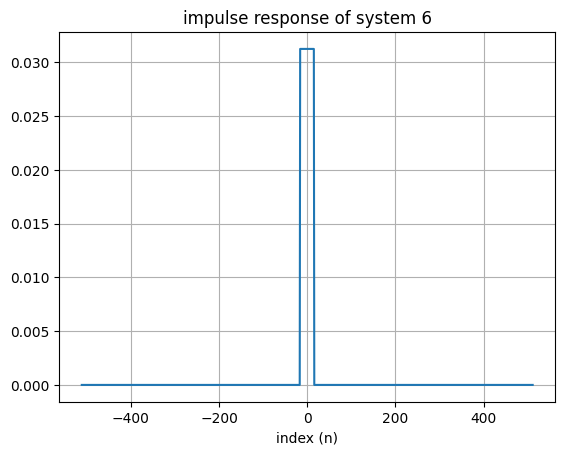

In [29]:
h = np.zeros(x.shape)
h[n0-16:n0+16] = 1/32
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 6')
plt.grid('on')
plt.show()

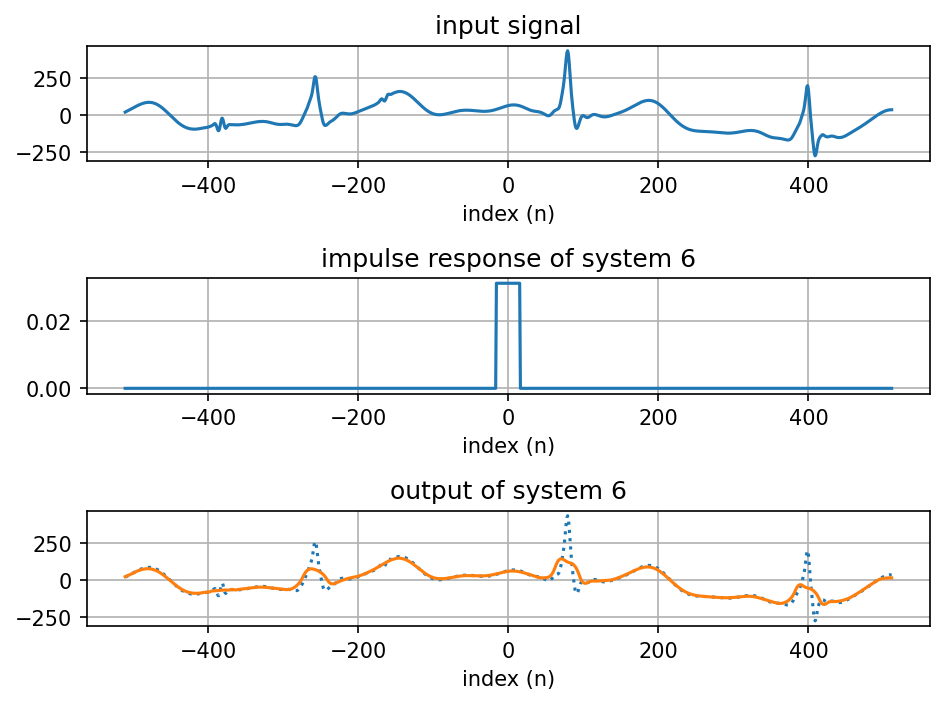

In [30]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 6')
plt.grid('on')


plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 6')
plt.grid('on')


plt.tight_layout()
plt.show()

## System 7
- h[n] is a delayed sinc

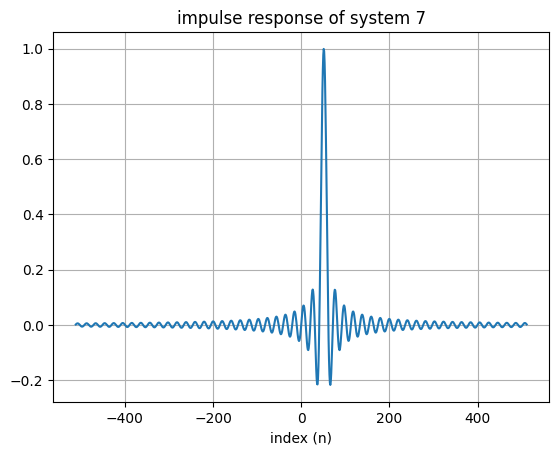

In [31]:
h = np.sinc(50*(t-0.1))
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 7')
plt.grid('on')
plt.show()

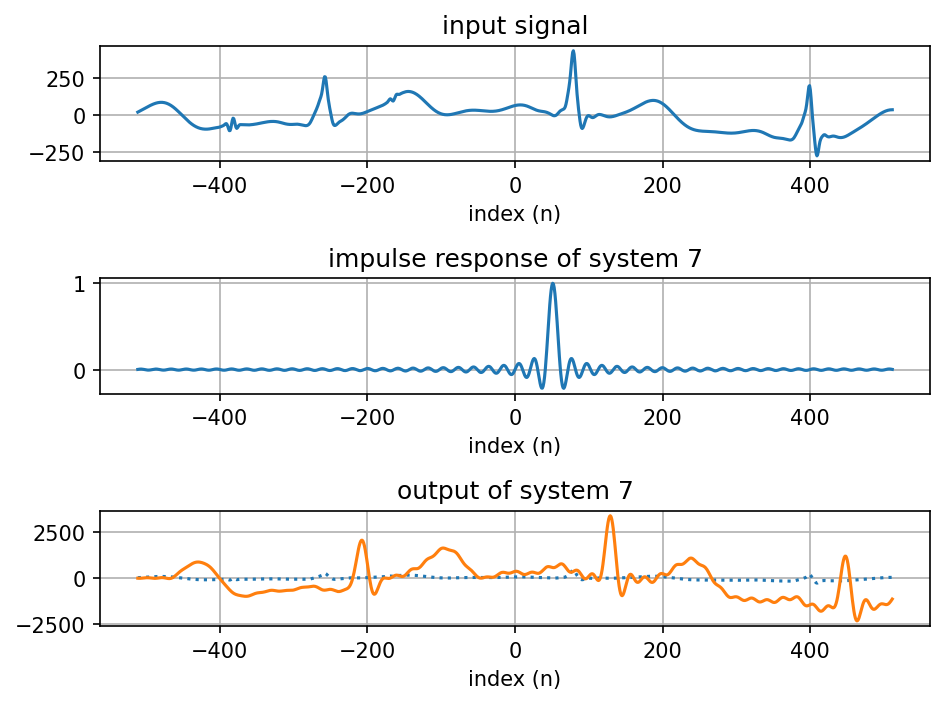

In [32]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 7')
plt.grid('on')


plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 7')
plt.grid('on')


plt.tight_layout()
plt.show()